## Test task for Insilica Medicina

### 1. Importing libraries and loading data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split

%matplotlib inline

s = tf.InteractiveSession()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('train.csv')
df.head()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
0,37.977273,6.758452,3.636364,10.792929,160.801682,151.109783,1.791689,6.818675,8.138413,8.270161,...,5.658393,4.151040,4.540632,4.953183,5.351562,5.311048,5.560922,5.643015,5.715999,0.0
1,19.408163,5.933978,2.816327,5.877551,162.949911,76.153796,1.381401,6.002651,5.080499,7.514421,...,4.830811,3.817712,4.123094,4.426343,4.823804,4.652173,4.795274,4.860781,5.001426,0.0
2,40.265306,7.425645,3.734694,13.160998,172.099640,161.790879,1.603976,7.410120,10.114794,8.805738,...,6.397659,4.223177,4.685597,5.116870,5.333926,5.504569,5.797956,6.009581,6.200889,0.0
3,43.976744,7.648293,3.837209,14.392765,168.885456,175.277251,1.622298,7.629033,12.180817,9.070719,...,5.879135,4.280132,4.563045,5.007714,5.159773,5.393628,5.640132,5.472271,5.741399,0.0
4,24.320988,6.534011,3.567901,8.913580,163.076959,96.019681,1.380679,6.566695,4.417010,8.058783,...,8.148663,4.624973,5.173321,5.720312,6.259342,6.626469,7.062406,7.472998,7.829842,0.0


### 2. Observations of the data

In [3]:
df.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,...,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,27.742579,6.290047,3.236920,7.491428,164.377256,113.795085,1.501021,6.355008,5.253647,7.827068,...,6.024404,4.072813,4.541461,5.014840,5.430717,5.579861,5.787684,5.953971,6.028088,0.714932
std,20.413483,0.450307,0.408842,2.436065,3.889228,112.425064,0.257075,0.433009,2.415804,0.406615,...,2.065185,0.438903,0.547054,0.682005,0.840487,1.045785,1.285064,1.499844,1.768280,0.451651
min,13.350000,5.462915,1.918367,1.700000,152.098222,51.492680,1.000430,5.528670,1.461925,7.115238,...,0.000000,1.945910,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.440000,5.974415,2.940000,5.671233,162.048568,80.307850,1.373305,6.049363,3.515523,7.533503,...,5.245543,3.844814,4.274928,4.682131,5.056246,5.104429,5.233445,5.280662,5.300814,0.000000
50%,23.857143,6.205155,3.226891,7.153846,163.985682,94.511762,1.454261,6.275934,4.719078,7.748862,...,6.444926,4.102643,4.608913,5.119490,5.565956,5.751630,6.022160,6.185437,6.350886,1.000000
75%,29.000000,6.551050,3.541667,8.945754,166.132788,115.676365,1.578338,6.605078,6.457771,8.050523,...,7.401155,4.350278,4.894101,5.428797,5.930752,6.221335,6.595642,6.944298,7.187766,1.000000
max,328.035714,9.073735,4.849057,21.400000,182.962897,1833.054695,4.467683,8.896735,19.884182,10.379168,...,11.560520,5.231109,5.995208,6.907755,7.792581,8.592306,9.389102,10.172406,10.918976,1.000000


#### As we can see, the features are not scaled, so we need to scale them before applying algorithms sensitive to unscaled data

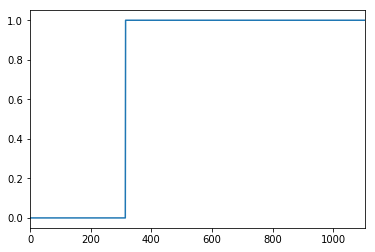

In [4]:
df['y'].plot()

#### The samples are sorted by the target variable, so we need to shuffle the dataframe before creating dataframe (index especially!) for validation puproses

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
0,28.545455,6.651418,3.712121,9.309764,165.405438,114.713132,1.536273,6.683435,7.620422,8.110357,...,6.986220,4.457250,4.999743,5.440522,5.748995,6.022539,6.242953,6.540850,6.827358,1.0
1,328.035714,6.784718,3.785714,11.966878,155.930390,1833.054695,4.467683,7.046139,9.558971,8.344835,...,2.784239,3.901973,4.433789,5.009802,5.465155,5.766366,5.831149,5.674182,5.154014,0.0
2,29.659091,6.460532,3.522727,9.055556,161.954677,117.542522,1.588749,6.518411,6.925110,7.994211,...,5.110103,4.034241,4.415824,4.817253,5.161567,5.095666,5.177208,5.280662,5.213236,0.0
3,47.700000,8.084170,4.250000,16.222222,178.243310,195.910748,1.846911,8.035720,12.967185,9.220764,...,5.481485,3.766997,4.295583,4.972847,5.447545,5.731874,6.122476,6.440205,5.853392,1.0
4,28.129032,7.171929,3.451613,11.161290,171.779469,112.549080,1.277911,7.143116,9.522401,8.577647,...,5.348297,3.839452,4.359909,4.837273,5.307339,5.495887,5.408292,5.507869,5.574765,1.0


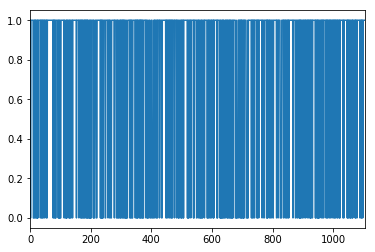

In [6]:
df['y'].plot()

#### Much better!

### 3. Creating X_train, y_train, X_test, y_test

In [7]:
from sklearn.preprocessing import StandardScaler

# as we have a problem with unbalanced classes
# let's keep the ratio between the classes the same
# in train set and test set
X = df.drop(['y'], axis = 1)
y = df['y']
sclaler = StandardScaler()
X = pd.DataFrame(data = sclaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)
print('Ratio of class 1 in train samples: ',len(y_train[y_train==1])/len(y_train))
print('Ratio of class 1 in test samples: ',len(y_test[y_test==1])/len(y_test))
X_train.head()

Ratio of class 1 in train samples:  0.7149321266968326
Ratio of class 1 in test samples:  0.7149321266968326


,0,1,2,3,4,5,6,7,8,9,...,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523
763,2.908627,1.477274,1.644830,0.620007,-0.812624,2.284722,3.222096,2.529607,-0.820249,2.876773,...,-1.372435,-2.918446,-1.022264,-0.678351,-0.520679,-0.372688,-0.315581,-0.564807,-1.032076,-3.410555
873,-0.312806,-0.495120,-0.286107,-0.251104,-0.149656,-0.264005,-0.192711,-0.503996,-0.422541,-0.580171,...,-1.502921,-0.847511,-1.493229,-1.235320,-1.100786,-0.916824,-1.036561,-0.848185,-0.786125,-0.756297
865,-0.226305,-1.263537,-1.191512,-1.300359,0.010336,-0.184225,-0.154571,-1.176653,-1.285310,-1.158939,...,-0.383726,0.160215,-0.343830,-0.117270,0.067730,0.247156,0.302718,0.305994,0.379985,0.419691
647,-0.156526,0.409961,0.792978,0.509363,-0.814648,-0.149522,-0.188406,0.383919,0.237434,0.404868,...,1.586510,1.176140,1.561592,1.497159,1.341384,1.269741,1.204695,1.166657,1.160300,1.189096
105,-0.082241,0.418438,1.077920,0.818265,-1.933115,-0.094047,0.402978,0.443211,0.415216,0.356928,...,-0.427213,0.366104,-0.233691,-0.035977,0.104463,0.143199,0.132401,0.092807,0.188982,0.301702


### 4. Creating 

## Feature Extraction Methods

In [8]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,...,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,-0.032722,0.004110,0.022538,0.012069,0.003004,-0.034553,-0.013982,0.003059,0.000081,0.000597,...,-0.004394,0.000678,-0.001694,0.000270,0.002000,-0.003822,-0.001523,0.003452,0.002643,0.000596
std,0.794001,1.029274,1.019924,1.033372,1.002643,0.771245,0.894290,1.030176,1.025980,1.031773,...,1.034460,1.037043,1.041930,1.045138,1.044645,1.052651,1.049541,1.036979,1.037573,1.040485
min,-0.705372,-1.837649,-3.226550,-2.378447,-3.158620,-0.554419,-1.948138,-1.909228,-1.570259,-1.751417,...,-4.435228,-2.918446,-4.848142,-5.770166,-7.356416,-6.464318,-5.337989,-4.505849,-3.971525,-3.410555
25%,-0.366857,-0.731345,-0.701195,-0.756303,-0.598532,-0.304308,-0.497038,-0.728693,-0.734776,-0.733509,...,-0.608998,-0.374092,-0.531932,-0.507422,-0.488485,-0.445742,-0.453735,-0.427994,-0.448645,-0.434564
50%,-0.190108,-0.180085,-0.007908,-0.136977,-0.089325,-0.171612,-0.180969,-0.168300,-0.220857,-0.188032,...,0.051174,0.243566,0.067996,0.141474,0.179591,0.194653,0.178795,0.196342,0.194212,0.217002
75%,0.054942,0.598580,0.776140,0.644636,0.452259,0.018034,0.309998,0.628393,0.521454,0.575000,...,0.662070,0.675376,0.647122,0.682198,0.624445,0.615874,0.635272,0.651480,0.678428,0.671348
max,14.717190,6.184554,3.944963,5.712028,4.507489,15.299418,11.545277,5.872578,6.058919,6.279296,...,2.564417,2.681901,2.640261,2.658611,2.776772,2.811386,2.881865,2.803789,2.813856,2.767153


In [9]:
"""
        CODE BELOW PARTIALY TAKEN FROM 
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
        
"""
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print()


### Random Forest

In [30]:
from time import time
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier

param_dist = {'n_estimators': randint(5, 50),
              "max_depth": randint(5, 10),
              "max_features": randint(1, 5),
              #"min_samples_split": sp_randint(2, 11),
              #"min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 50
clf = RandomForestClassifier(n_jobs=-1)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   cv = 5,
                                   n_iter=n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV took 94.64 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.908 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'n_estimators': 24}

Model with rank: 2
Mean validation score: 0.901 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'n_estimators': 28}

Model with rank: 3
Mean validation score: 0.898 (std: 0.017)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'n_estimators': 47}

Model with rank: 4
Mean validation score: 0.897 (std: 0.024)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'n_estimators': 46}

Model with rank: 5
Mean validation score: 0.897 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'n_estimators': 17}

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.6min finished


In [29]:
y_pred_train = random_search.best_estimator_.predict_proba(X_train)
print('train_score :',
      roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1)))
y_pred = random_search.best_estimator_.predict_proba(X_test)
print('test_score :',
      roc_auc_score(y_test, np.argmax(y_pred, axis = 1)))

train_score : 0.7182539682539683
test_score : 0.695248141450673


Feature ranking:
1. feature 526 (0.009462)
2. feature 96 (0.008099)
3. feature 101 (0.007680)
4. feature 56 (0.007518)
5. feature 16 (0.007186)
6. feature 293 (0.006497)
7. feature 560 (0.006446)
8. feature 1419 (0.006245)
9. feature 1460 (0.006242)
10. feature 58 (0.005940)
11. feature 872 (0.005809)
12. feature 90 (0.005762)
13. feature 559 (0.005752)
14. feature 1303 (0.005659)
15. feature 1302 (0.005375)
16. feature 696 (0.005264)
17. feature 1479 (0.005174)
18. feature 1509 (0.005033)
19. feature 33 (0.004763)
20. feature 156 (0.004654)
21. feature 1022 (0.004558)
22. feature 750 (0.004514)
23. feature 226 (0.004333)
24. feature 87 (0.004216)
25. feature 920 (0.004097)
26. feature 178 (0.004080)
27. feature 471 (0.004040)
28. feature 330 (0.004014)
29. feature 30 (0.004008)
30. feature 556 (0.003767)
31. feature 466 (0.003665)
32. feature 47 (0.003609)
33. feature 555 (0.003588)
34. feature 822 (0.003490)
35. feature 718 (0.003464)
36. feature 1024 (0.003423)
37. feature 1 (0.0034

551. feature 1339 (0.000585)
552. feature 83 (0.000584)
553. feature 662 (0.000581)
554. feature 899 (0.000580)
555. feature 333 (0.000579)
556. feature 1121 (0.000578)
557. feature 753 (0.000576)
558. feature 146 (0.000576)
559. feature 1418 (0.000573)
560. feature 327 (0.000569)
561. feature 1226 (0.000569)
562. feature 1131 (0.000566)
563. feature 126 (0.000563)
564. feature 883 (0.000563)
565. feature 411 (0.000560)
566. feature 127 (0.000559)
567. feature 752 (0.000558)
568. feature 593 (0.000555)
569. feature 1235 (0.000555)
570. feature 528 (0.000554)
571. feature 548 (0.000554)
572. feature 1256 (0.000553)
573. feature 441 (0.000549)
574. feature 262 (0.000549)
575. feature 638 (0.000546)
576. feature 234 (0.000546)
577. feature 122 (0.000546)
578. feature 367 (0.000544)
579. feature 344 (0.000544)
580. feature 489 (0.000543)
581. feature 1242 (0.000537)
582. feature 114 (0.000537)
583. feature 1030 (0.000534)
584. feature 1013 (0.000534)
585. feature 1002 (0.000534)
586. featu

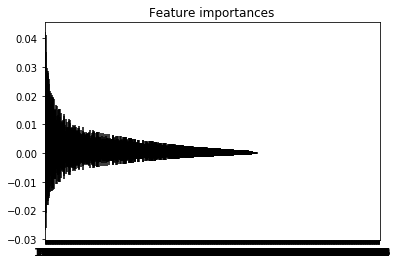

In [31]:
importances = random_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_search.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [66]:
rf_importances = pd.Series(data = importances, index = X_train.columns)
rf_importances = rf_importances.sort_values(ascending = False)
rf_coeffs = rf_importances[rf_importances > 0.002].index
rf_coeffs

Int64Index([ 526,   96,  101,   56,   16,  293,  560, 1419, 1460,   58,
            ...
             250,  370,  551,  102,  456, 1521,  539,  468,   85,  675],
           dtype='int64', length=111)

In [45]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression


param_dist = {"C": uniform(1e-8, 0.2),
              "tol": uniform(1e-8, 1e-1),
              "penalty": ['l1'],
              "solver": ['liblinear', 'saga'],
              #"dual": [True, False],
              'class_weight': ['balanced', None]}

# build a classifier
clf = LogisticRegression(n_jobs=-1)

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   cv = 7,
                                   n_iter=n_iter_search,
                                   verbose = 1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.

RandomizedSearchCV took 166.81 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.878 (std: 0.017)
Parameters: {'C': 0.11645459656361513, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.05670615714655995}

Model with rank: 2
Mean validation score: 0.876 (std: 0.022)
Parameters: {'C': 0.15184122166982233, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.04572965175183014}

Model with rank: 3
Mean validation score: 0.874 (std: 0.016)
Parameters: {'C': 0.19889463278903458, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.09939438010107943}

Model with rank: 3
Mean validation score: 0.874 (std: 0.026)
Parameters: {'C': 0.09221700766708049, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01853148457682981}

Model with rank: 5
Mean validation score: 0.873 (std: 0.025)
Parameters: {'C': 0.1439206436467392, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.073

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  2.8min finished
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [46]:
y_pred_train = random_search.best_estimator_.predict_proba(X_train)
print('train_score :',
      roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1)))
y_pred = random_search.best_estimator_.predict_proba(X_test)
print('test_score :',
      roc_auc_score(y_test, np.argmax(y_pred, axis = 1)))

train_score : 0.877448764315853
test_score : 0.8223829616234679


In [55]:
.shape

(1, 1524)

In [59]:
coeffs[coeffs>0]

array([0.032401  , 0.16194719, 0.02373004, 0.06896174, 0.02007376,
       0.00389176, 0.04612026, 0.05322972, 0.01102769, 0.08050078,
       0.03546783, 0.00276763, 0.03492062, 0.09354405, 0.04088613,
       0.03083829, 0.04261634, 0.07389231, 0.16015404, 0.12551274,
       0.03875988, 0.01845384, 0.04293692, 0.11233461, 0.16551298,
       0.10404016, 0.00441763, 0.05137158, 0.01181692, 0.05519263,
       0.1000573 , 0.12610619, 0.09050826, 0.05396971, 0.030369  ,
       0.04778601, 0.03611956, 0.01401507, 0.0122143 , 0.02614327,
       0.07493729, 0.05102846, 0.10176001, 0.1460539 , 0.09516401,
       0.02717197, 0.04278354, 0.03294218, 0.00139487, 0.05858727,
       0.04598833, 0.03104739, 0.00201445, 0.05231515, 0.09108383,
       0.02451899, 0.02671096, 0.05638673, 0.03602297, 0.04431612,
       0.03210856, 0.01660677, 0.06961253, 0.02744355, 0.07889207,
       0.00565998, 0.15588314, 0.01135154, 0.02064398, 0.00847772,
       0.07107206, 0.0706244 , 0.11931459, 0.02874196, 0.08279

In [64]:
lasso_importances = pd.Series(data = random_search.best_estimator_.coef_[0], index = X_train.columns)
lasso_importances = lasso_importances.sort_values(ascending = False)
lasso_features = lasso_importances[lasso_importances > 0].index
lasso_features

Int64Index([1183,  545,   15,  463, 1013,  799, 1476,  700,  478, 1078,  544,
             557,  796,  672,  801,  379,  868,  702, 1180,  209,  990,  789,
             458, 1348, 1060, 1073,  950,   81, 1413,  821,  875,  649,  706,
             148, 1199,  865,  568,  792, 1296,  722,  144,  823, 1383,  893,
            1435,  541,  811,  457,  381, 1347,  491,  744,  882,  357,  376,
             814,    4,  916,  839,  389,  721, 1088,  982,  802,  872,  783,
             869,   70, 1025,  127,  492, 1350,  937, 1349, 1443,  753,  781,
             569, 1020,  150, 1047, 1381, 1520, 1415,  998, 1523,  563,  130,
             360,  854, 1510,  820, 1299],
           dtype='int64')

RandomizedSearchCV took 176.91 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.870 (std: 0.008)
Parameters: {'C': 0.09279656300825595, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

Model with rank: 2
Mean validation score: 0.867 (std: 0.028)
Parameters: {'C': 0.11875791499741722, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Model with rank: 3
Mean validation score: 0.859 (std: 0.017)
Parameters: {'C': 0.7884881642395442, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

Model with rank: 3
Mean validation score: 0.859 (std: 0.031)
Parameters: {'C': 0.05211562854552627, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Model with rank: 5
Mean validation score: 0.857 (std: 0.020)
Parameters: {'C': 1.798445138960553, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}